In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar archivo subido
df = pd.read_csv("marketplace_orders.csv", sep=";")

# Si solo aparece una columna, reparamos el split
if df.shape[1] == 1:
    raw_header = df.columns[0]
    cols = [c.replace('"','').replace('\ufeff','').strip().lower() for c in raw_header.split(';')]
    df = df.iloc[:,0].astype(str).str.split(';', expand=True)
    df.columns = cols

# Convertir tipos
df["order_id"] = pd.to_numeric(df["order_id"], errors="coerce")
df["tiempo_entrega_dias"] = pd.to_numeric(df["tiempo_entrega_dias"], errors="coerce")
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce", dayfirst=True)

# Normalizar texto
for col in ["categoria", "estado", "motivo_error"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower().replace({"nan": None, "-": None, "": None})

print("✅ Dataset cargado y limpio")
print(df.info())
display(df.head())


✅ Dataset cargado y limpio
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             98 non-null     int64         
 1   fecha                98 non-null     datetime64[ns]
 2   categoria            98 non-null     object        
 3   estado               98 non-null     object        
 4   tiempo_entrega_dias  59 non-null     float64       
 5   motivo_error         58 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 4.7+ KB
None


,order_id,fecha,categoria,estado,tiempo_entrega_dias,motivo_error
0,1001,2025-08-01,electrónicos,entregado,3.0,None
1,1002,2025-08-01,moda,cancelado,NaN,inventario agotado
2,1003,2025-08-02,hogar,retrasado,8.0,logística
3,1004,2025-08-02,moda,entregado,4.0,None
4,1005,2025-08-03,deportes,error,NaN,producto equivocado


In [27]:
# Total de pedidos
total_pedidos = len(df)

# Filtrar errores (cancelado, error, retrasado)
errores = df[df["estado"].isin(["cancelado", "error", "retrasado"])]
porcentaje_errores = len(errores) / total_pedidos * 100

print(f"Total de pedidos: {total_pedidos}")
print(f"Pedidos con errores: {len(errores)} ({porcentaje_errores:.2f}%)")


Total de pedidos: 98
Pedidos con errores: 58 (59.18%)


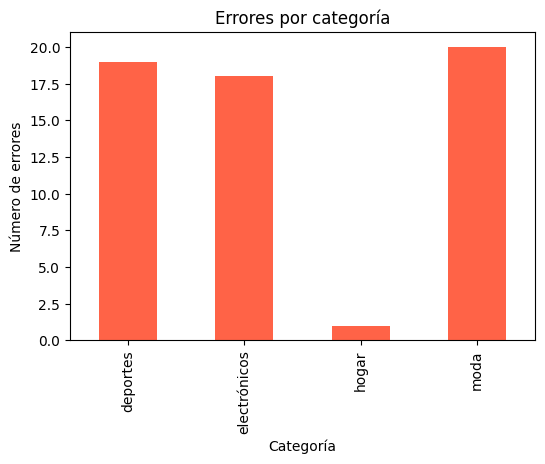

In [28]:
errores_categoria = errores.groupby("categoria")["order_id"].count()

errores_categoria.plot(kind="bar", figsize=(6,4), title="Errores por categoría", color="tomato")
plt.xlabel("Categoría")
plt.ylabel("Número de errores")
plt.show()


In [29]:
tiempo_promedio = df["tiempo_entrega_dias"].mean()
print(f"⏱️ Tiempo promedio de entrega: {tiempo_promedio:.2f} días")


⏱️ Tiempo promedio de entrega: 42.02 días


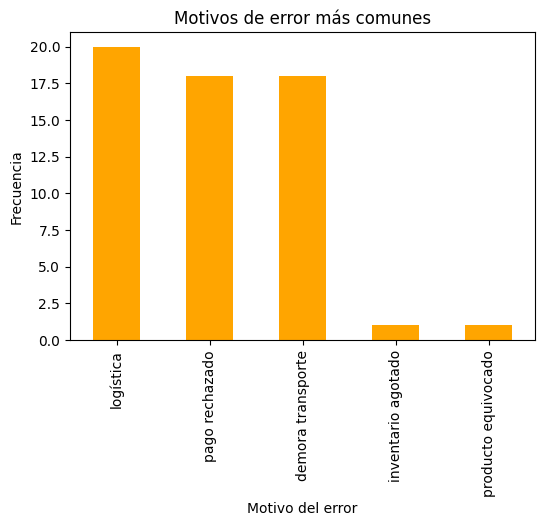

In [30]:
motivos = errores["motivo_error"].value_counts()

motivos.plot(kind="bar", figsize=(6,4), title="Motivos de error más comunes", color="orange")
plt.xlabel("Motivo del error")
plt.ylabel("Frecuencia")
plt.show()
